## Binary Classification Data


In [ ]:
from sklearn.datasets import make_circles
def make_some_circles(n_samples=1000, noise=0.03, random_state=False):
  if random_state:
    X, y = make_circles(n_samples=n_samples, noise=noise, random_state=random_state)
    return X, y
  else:
    X, y = make_circles(n_samples=n_samples, noise=noise)
    return X, y

X, y = make_some_circles()
X.shape, X # features

((1000, 2),
 array([[-0.28332251, -0.71566343],
        [ 0.48771145,  0.65451955],
        [-0.84791727,  0.5392191 ],
        ...,
        [-0.75447569,  0.2636698 ],
        [-0.61938272, -0.56561105],
        [ 0.96309023, -0.24543356]]))

## Multi-Class Classification Data

### Fashion Mnist

60,000 28x28 images corresponding to one of ten classes

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
def multiclassification_data_01():
  # fashion_mnist
  (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
  return train_data, train_labels, test_data, test_labels

X_train, y_train, X_test, y_test = multiclassification_data_01()
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

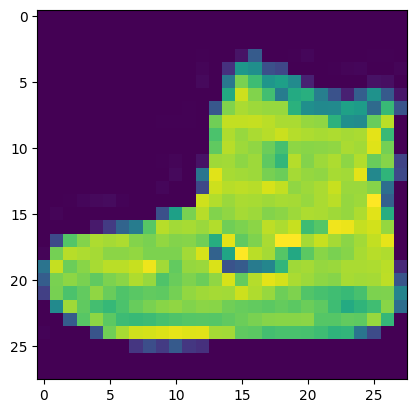

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

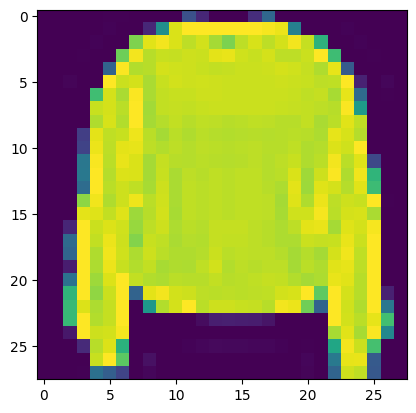

In [ ]:
plt.imshow(X_train[7])

## Convolutional Neural Network (CNN) Data

### Load CNN Image Batches:

**IMPORTANT** Add Data Augmentation Here!!!

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_CNN_Image_Batches(path, rescale=1./255, image_size=(224, 224), batch_size=32, class_mode="binary", random_seed=False):
  # Set the seed
  if random_seed:
    tf.random.set_seed(42)

  # Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
  train_datagen = ImageDataGenerator(rescale=rescale)
  valid_datagen = ImageDataGenerator(rescale=rescale)

  '''
  # Data augmentation
  train_datagen = ImageDataGenerator(rescale=rescale,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
  '''

  # Setup the train and test directories
  train_dir = f"{path}/train/"
  test_dir = f"{path}/test/"

  # Import data from directories and turn it into batches
  if random_seed:
    train_data = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=batch_size, # number of images to process at a time
                                                  target_size=image_size, # convert all images to be 224 x 224
                                                  class_mode=class_mode, # type of problem we're working on
                                                  shuffle=True,
                                                  seed=random_seed)
    valid_data = valid_datagen.flow_from_directory(test_dir,
                                                batch_size=batch_size,
                                                target_size=image_size,
                                                class_mode=class_mode,
                                                seed=random_seed)
    return train_data, valid_data
  else:
    train_data = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=batch_size, # number of images to process at a time
                                                  target_size=image_size, # convert all images to be 224 x 224
                                                  class_mode=class_mode,
                                                  shuffle=True) # type of problem we're working on)
    valid_data = valid_datagen.flow_from_directory(test_dir,
                                                batch_size=batch_size,
                                                target_size=image_size,
                                                class_mode=class_mode)
    return train_data, valid_data

'''
  HOW TO USE
  train_data, valid_data = load_CNN_Image_Batches('pizza_steak', 1./255, (224, 224), 32, "binary", 42)
  num_batches = len(train_data)
  next_batch_images, next_batch_labels = train_data.next()
  len(next_batch_images), next_batch_images.shape # 32 images at 224x224 with 3 color channels (32, 224, 224, 3)
'''




### Load Image as Tensor and Shape It As Well

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_width=224, img_height=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_width, img_height])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

# Test our model on a custom image
# Example: pred_and_plot(model_8, "03-steak.jpeg", class_names)

### Pizza Steak Image Set


In [ ]:
import zipfile

def load_pizza_steak_data():
  # Download zip file of pizza_steak images
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

  # Unzip the downloaded file
  zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
  zip_ref.extractall()
  zip_ref.close()

#load_pizza_steak_data()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

